In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from keras.layers.normalization import BatchNormalization
import numpy as np
import pandas as pd
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import pydot

import pickle
import os
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

In [47]:
train_images = pickle.load( open( "../imagenet-200/train_images.pkl", "rb" ) )
train_labels = pickle.load( open( "../imagenet-200/train_labels.pkl", "rb" ) )
val_images = pickle.load( open( "../imagenet-200/val_images.pkl", "rb" ) )
val_labels = pickle.load( open( "../imagenet-200/val_labels.pkl", "rb" ) )

In [48]:
text_labels = pd.read_csv('../imagenet-200/map_clsloc.txt', sep='\s', header=None, engine='python')
text_labels.columns=['label', 'id', 'description']
text_labels.head()

,label,id,description
0,n02119789,1,kit_fox
1,n02100735,2,English_setter
2,n02110185,3,Siberian_husky
3,n02096294,4,Australian_terrier
4,n02102040,5,English_springer


In [49]:
text_labels.count()

label          1000
id             1000
description    1000
dtype: int64

In [50]:
train_images.shape

(100000, 32, 32, 3)

In [51]:
type(train_images[0][0][0][0])

numpy.uint8

In [52]:
# [image_index][R][G][B]
train_images[1200][0][0][2]

167

In [53]:
train_images = train_images.astype('float32')
val_images = val_images.astype('float32')

# beacuse pixel values are between 0 to 255
train_images /= 255
val_images /= 255

In [81]:
enc = OneHotEncoder(categories='auto')
y_train = enc.fit_transform(train_labels.reshape(-1, 1)).toarray()
y_val = enc.transform(val_labels.reshape(-1, 1)).toarray()

In [82]:
enc.categories_

[array(['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640',
        'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750',
        'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289',
        'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695',
        'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02085620',
        'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799',
        'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165',
        'n02132136', 'n02165456', 'n02190166', 'n02206856', 'n02226429',
        'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972',
        'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003',
        'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495',
        'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196',
        'n02669723', 'n02699494', 'n02730930', 'n02769748', 'n02788148',
        'n02791270', 'n02793495', 'n02795169', 'n02

In [83]:
train_images, train_labels, y_train = shuffle(train_images, train_labels, y_train, random_state=41)

In [84]:
[train_images.shape, train_labels.shape, y_train.shape]

[(100000, 32, 32, 3), (100000,), (100000, 200)]

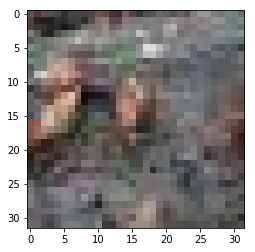

         label   id description
652  n01944390  653       snail


In [85]:
plotData = train_images[0]
plt.imshow(plotData)
plt.show()
print(text_labels.loc[text_labels['label']==train_labels[0]])

In [86]:
model = Sequential()


model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(Flatten())
model.add(Dense(4096, input_shape=(32*32*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.4))
#model.add(BatchNormalization())
model.add(Dense(200, activation='softmax'))
# model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=["accuracy"])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
activation_25 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 256)         2973952   
_________________________________________________________________
activation_26 (Activation)   (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 2, 2, 384)         885120    
__________

In [87]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
batch_size = 32
epochs = 50
history_start = model.fit(train_images, 
                          y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(val_images, 
                                     y_val))

model.save('AlexNet_image200.h5')

Train on 100000 samples, validate on 10000 samples
Epoch 1/50
100000/100000 [==============================] - 5598s 56ms/step - loss: 5.2986 - acc: 0.0047 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 2/50
100000/100000 [==============================] - 1837s 18ms/step - loss: 5.2985 - acc: 0.0048 - val_loss: 5.2982 - val_acc: 0.0058
Epoch 3/50
100000/100000 [==============================] - 1633s 16ms/step - loss: 5.2985 - acc: 0.0046 - val_loss: 5.2981 - val_acc: 0.0078
Epoch 4/50
100000/100000 [==============================] - 1782s 18ms/step - loss: 5.2982 - acc: 0.0051 - val_loss: 5.2977 - val_acc: 0.0076
Epoch 5/50
100000/100000 [==============================] - 1690s 17ms/step - loss: 5.2975 - acc: 0.0065 - val_loss: 5.2957 - val_acc: 0.0086
Epoch 6/50
100000/100000 [==============================] - 1641s 16ms/step - loss: 5.2888 - acc: 0.0076 - val_loss: 5.2466 - val_acc: 0.0077
Epoch 7/50
100000/100000 [==============================] - 1859s 19ms/step - loss: 5.2088 - acc: